# Gemini LLM

ตัวอย่างเอามาจากเอกสารของ [Google](https://ai.google.dev/gemini-api/docs/quickstart?hl=th) ให้ตั้งค่าตัวแปรแวดล้อม GEMINI_API_KEY ในไฟล์ .env

In [ ]:
# ถ้าไม่ได้ใช้ .env สามารถเซ็ตตัวแปรแวดล้อมแบบนี้ได้
# %env GEMINI_API_KEY=xxxx
!uv add google-genai

# Generate แบบง่าย
generate_content เพื่อส่งคำขอไปยัง Gemini API โดยใช้โมเดล Gemini 2.5 Flash ส่งแล้วตอบแบบไม่มีความจำ(history)

In [10]:
from google import genai
client = genai.Client()
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="อธิบายคำว่า LLM (Large Language Model) ในภาษาไทยอย่างย่อ",
)
print(response.text)

LLM (Large Language Model) หรือ **แบบจำลองภาษาขนาดใหญ่** คือ ปัญญาประดิษฐ์ (AI) ชนิดหนึ่งที่ถูกฝึกฝนด้วย**ข้อมูลข้อความมหาศาล** (เช่น หนังสือ, บทความ, เว็บไซต์) เพื่อให้มันสามารถ **เข้าใจ สร้าง และประมวลผลภาษาของมนุษย์ได้อย่างเป็นธรรมชาติ** คล้ายสมองกลที่มีความรู้ด้านภาษาในระดับสูงมากนั่นเองครับ


# Generate แบบซับซ้อนขึ้น
ส่งข้อความและภาพ และตั้งค่า config ติดตั้ง Pillow เพื่อที่จะใช้งานการอ่านภาพ

In [11]:
!uv add Pillow

Resolved 59 packages in 4ms
Audited 24 packages in 0.02ms


In [ ]:
from PIL import Image
from google import genai
from google.genai import types
image = Image.open("../img/dog.jpeg")
client = genai.Client()
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[image,"ภาพนี้คืออะไร"],
    config=types.GenerateContentConfig(
        system_instruction="คุณเป็นผู้เชี่ยวชาญด้านการวิเคราะห์ภาพ",
        temperature=0.7,
        thinking_config=types.ThinkingConfig(thinking_budget=0) # Disables thinking
    ),
)
print(response.text)

ภาพนี้เป็นภาพของสุนัขพันธุ์ชิวาวาขนสีขาว กำลังทำท่าทางน่ารักและขี้เล่น โดยมีรายละเอียดดังนี้:

*   **ตัวแบบหลัก:** สุนัขชิวาวาขนฟูสีขาวสะอาด ตัวเล็กกะทัดรัด มีหูตั้ง ดวงตากลมโตสีเข้ม และจมูกสีดำ
*   **ท่าทาง:** สุนัขกำลังกระพริบตาข้างหนึ่ง (ทำท่าขยิบตา) และยกอุ้งเท้าหน้าข้างหนึ่งขึ้นมาแตะบริเวณปากหรือจมูกเล็กน้อย ดูเหมือนกำลังทำท่าทางครุ่นคิดหรือซุกซน
*   **เครื่องแต่งกาย:** สุนัขสวมสายรัดอกหรือสายจูงที่มีสีสันสดใส ประกอบด้วยสีส้มอิฐ สีเขียวเข้ม และสีน้ำเงิน
*   **ฉากหลัง:** ฉากหลังเป็นภาพเบลอ (bokeh) ที่ให้ความรู้สึกนุ่มนวลและไม่รบกวนสายตา โดยมีโทนสีน้ำตาลเข้มและเขียวมะกอก ซึ่งบ่งบอกว่าเป็นสภาพแวดล้อมกลางแจ้ง เช่น ในสวนหรือป่าไม้
*   **องค์ประกอบอื่นๆ:** สุนัขกำลังยืนอยู่บนท่อนไม้หรือพื้นผิวที่มีลักษณะเป็นเปลือกไม้ขรุขระ ซึ่งเป็นส่วนหนึ่งของฉากหน้า

โดยรวมแล้ว ภาพนี้เป็นภาพที่น่ารักและสื่อถึงความขี้เล่นของสุนัขชิวาวาได้เป็นอย่างดี ด้วยท่าทางที่เป็นเอกลักษณ์และการจัดองค์ประกอบที่โดดเด่น


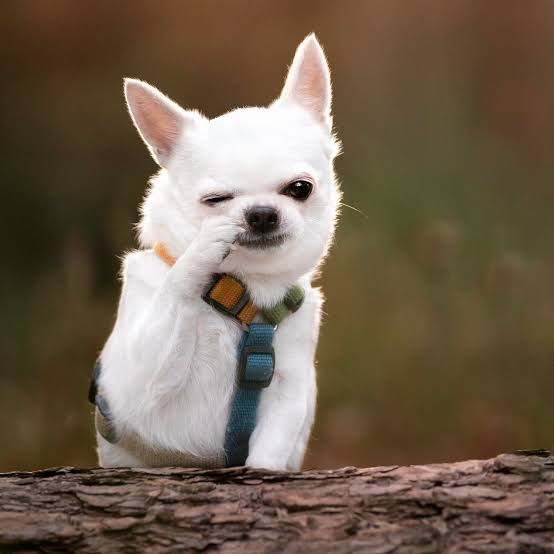

In [4]:
image

## [Multi-turn conversations (Chat)](https://ai.google.dev/gemini-api/docs/text-generation#multi-turn-conversations)
ใช้โหมด chat จะมี history ทำให้คุยต่อเนื่องได้ ในเบื้องหลังจะเรียก [generate_content()](https://ai.google.dev/api/generate-content)

In [12]:

chat = client.chats.create(model="gemini-2.5-flash")
response = chat.send_message("ที่บ้านเลี้ยงสุนัขและแมวในบ้านอย่างละสองตัว จะมีปัญหาหรือไม่ ตอบมาสั้นๆ")
print(response.text)
response = chat.send_message("จะมีขาสัตว์เสี้ยงกี่ขาในบ้าน?")
print(response.text)
for message in chat.get_history():
    print(f'role - {message.role}',end=": ")
    print(message.parts[0].text)

โดยทั่วไปแล้ว **ไม่จำเป็นต้องมีปัญหาเสมอไป** ครับ

ขึ้นอยู่กับ:
1.  **นิสัยของสัตว์แต่ละตัว:** ว่าเข้ากันได้ดีหรือไม่
2.  **การจัดการของเจ้าของ:** มีพื้นที่เพียงพอ, มีทรัพยากร (อาหาร น้ำ ของเล่น กระบะทราย) แยกกันและเพียงพอ, มีการแนะนำให้รู้จักกันอย่างค่อยเป็นค่อยไป และให้ความรักความเอาใจใส่ที่ทั่วถึง
สุนัข 2 ตัว x 4 ขา/ตัว = 8 ขา
แมว 2 ตัว x 4 ขา/ตัว = 8 ขา

รวมทั้งหมด: **16 ขา** ครับ
role - user: ที่บ้านเลี้ยงสุนัขและแมวในบ้านอย่างละสองตัว จะมีปัญหาหรือไม่ ตอบมาสั้นๆ
role - model: โดยทั่วไปแล้ว **ไม่จำเป็นต้องมีปัญหาเสมอไป** ครับ

ขึ้นอยู่กับ:
1.  **นิสัยของสัตว์แต่ละตัว:** ว่าเข้ากันได้ดีหรือไม่
2.  **การจัดการของเจ้าของ:** มีพื้นที่เพียงพอ, มีทรัพยากร (อาหาร น้ำ ของเล่น กระบะทราย) แยกกันและเพียงพอ, มีการแนะนำให้รู้จักกันอย่างค่อยเป็นค่อยไป และให้ความรักความเอาใจใส่ที่ทั่วถึง
role - user: จะมีขาสัตว์เสี้ยงกี่ขาในบ้าน?
role - model: สุนัข 2 ตัว x 4 ขา/ตัว = 8 ขา
แมว 2 ตัว x 4 ขา/ตัว = 8 ขา

รวมทั้งหมด: **16 ขา** ครับ


## Stream
อ่านคำตอบเรื่อยๆแบบไม่ต้องรอให้ทำงานเสร็จ

In [8]:
response = chat.send_message_stream("แนะนำสถานที่ท่องเที่ยวในไทยซัก 5 แห่ง")
for chunk in response:
    print(chunk.text, end="")

นี่คือ 5 สถานที่ท่องเที่ยวแนะนำในประเทศไทยที่หลากหลายและเป็นที่นิยมครับ:

1.  **กรุงเทพฯ (Bangkok):** เมืองหลวงที่มีชีวิตชีวา เต็มไปด้วยวัดวาอารามที่งดงาม (เช่น วัดอรุณ, วัดโพธิ์), แหล่งช้อปปิ้งทันสมัย, ตลาดนัดจตุจักร, และอาหารริมทางแสนอร่อย
2.  **เชียงใหม่ (Chiang Mai):** เสน่ห์ล้านนาทางภาคเหนือ ที่มีวัดเก่าแก่ (เช่น วัดพระธาตุดอยสุเทพ), ภูเขาที่สวยงาม, สวนสัตว์, หมู่บ้านช้าง, และวัฒนธรรมที่เป็นเอกลักษณ์
3.  **ภูเก็ต (Phuket):** ราชินีแห่งอันดามัน มีชายหาดที่สวยงามระดับโลก (เช่น หาดป่าตอง, หาดกะรน), น้ำทะเลใส, จุดดำน้ำ, และเกาะใกล้เคียงที่น่าสนใจ (เช่น เกาะพีพี, เกาะไข่)
4.  **อยุธยา (Ayutthaya):** อดีตราชธานีอันยิ่งใหญ่และเป็นมรดกโลกของ UNESCO ที่นี่คุณสามารถเดินชมอุทยานประวัติศาสตร์ที่มีซากปรักหักพังของวัดและพระราชวังเก่าแก่ ซึ่งสะท้อนความรุ่งเรืองในอดีต
5.  **กาญจนบุรี (Kanchanaburi):** เมืองแห่งประวัติศาสตร์และธรรมชาติ มีสถานที่สำคัญอย่างสะพานข้ามแม่น้ำแคว, พิพิธภัณฑ์สงคราม, และน้ำตกที่สวยงามหลายแห่ง เช่น น้ำตกเอราวัณ และน้ำตกไทรโยค

## Automatic function calling (Python only)


In [14]:
# Define the function with type hints and docstring
def get_current_temperature(location: str) -> dict:
    """Gets the current temperature for a given location.

    Args:
        location: The city and state, e.g. San Francisco, CA

    Returns:
        A dictionary containing the temperature and unit.
    """
    # ... (implementation) ...
    return {"temperature": 25, "unit": "Celsius"}

config = types.GenerateContentConfig(
    tools=[get_current_temperature]
)  # Pass the function itself

# Make the request
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="What's the temperature in Bangkok?",
    config=config,
)
print(response.text)  # The SDK handles the function call and returns the final text

The current temperature in Bangkok is 25 degrees Celsius.
